In [1]:
import sys
sys.path.append('../../src/')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from utils.utils import train_data, plot_results


%matplotlib inline

In [2]:
name = '30 hidden layers'
activation = 'relu'
batch_size = 128
neurons_number = 64
epochs = 20
optimize = 'Adam'

In [3]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))

for i in range(30):
    model.add(keras.layers.Dense(neurons_number, activation=activation))

model.add(keras.layers.Dense(1, name='output'))
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse', 'mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 64)                128       
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4

In [4]:
X_train, Y_train = train_data(start=0, end=0.8, number=10000)
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 0.0630 - mse: 0.0630 - mean_absolute_error: 0.2000 - val_loss: 0.0026 - val_mse: 0.0026 - val_mean_absolute_error: 0.0505
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 2.1374e-04 - mse: 2.1374e-04 - mean_absolute_error: 0.0090 - val_loss: 1.3126e-05 - val_mse: 1.3126e-05 - val_mean_absolute_error: 0.0029
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 5.0547e-05 - mse: 5.0547e-05 - mean_absolute_error: 0.0043 - val_loss: 4.8313e-05 - val_mse: 4.8313e-05 - val_mean_absolute_error: 0.0062
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 3.0023e-05 - mse: 3.0023e-05 - mean_absolute_error: 0.0017 - val_loss: 9.2658e-04 - val_mse: 9.2658e-04 - val_mean_absolute_error: 0.0299
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 6.2256e-04 - mse: 6.2256e-04 - mean_absolute_error: 0.0178 - val_loss: 1.2829e-04 - val_mse: 1.2829e-04 

In [5]:
X_test, Y_test = train_data(start=0, end=1.0, number=333)
loss, mse, mean_absolute_error = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 613us/step - loss: 2.6742e-04 - mse: 2.6742e-04 - mean_absolute_error: 0.0112


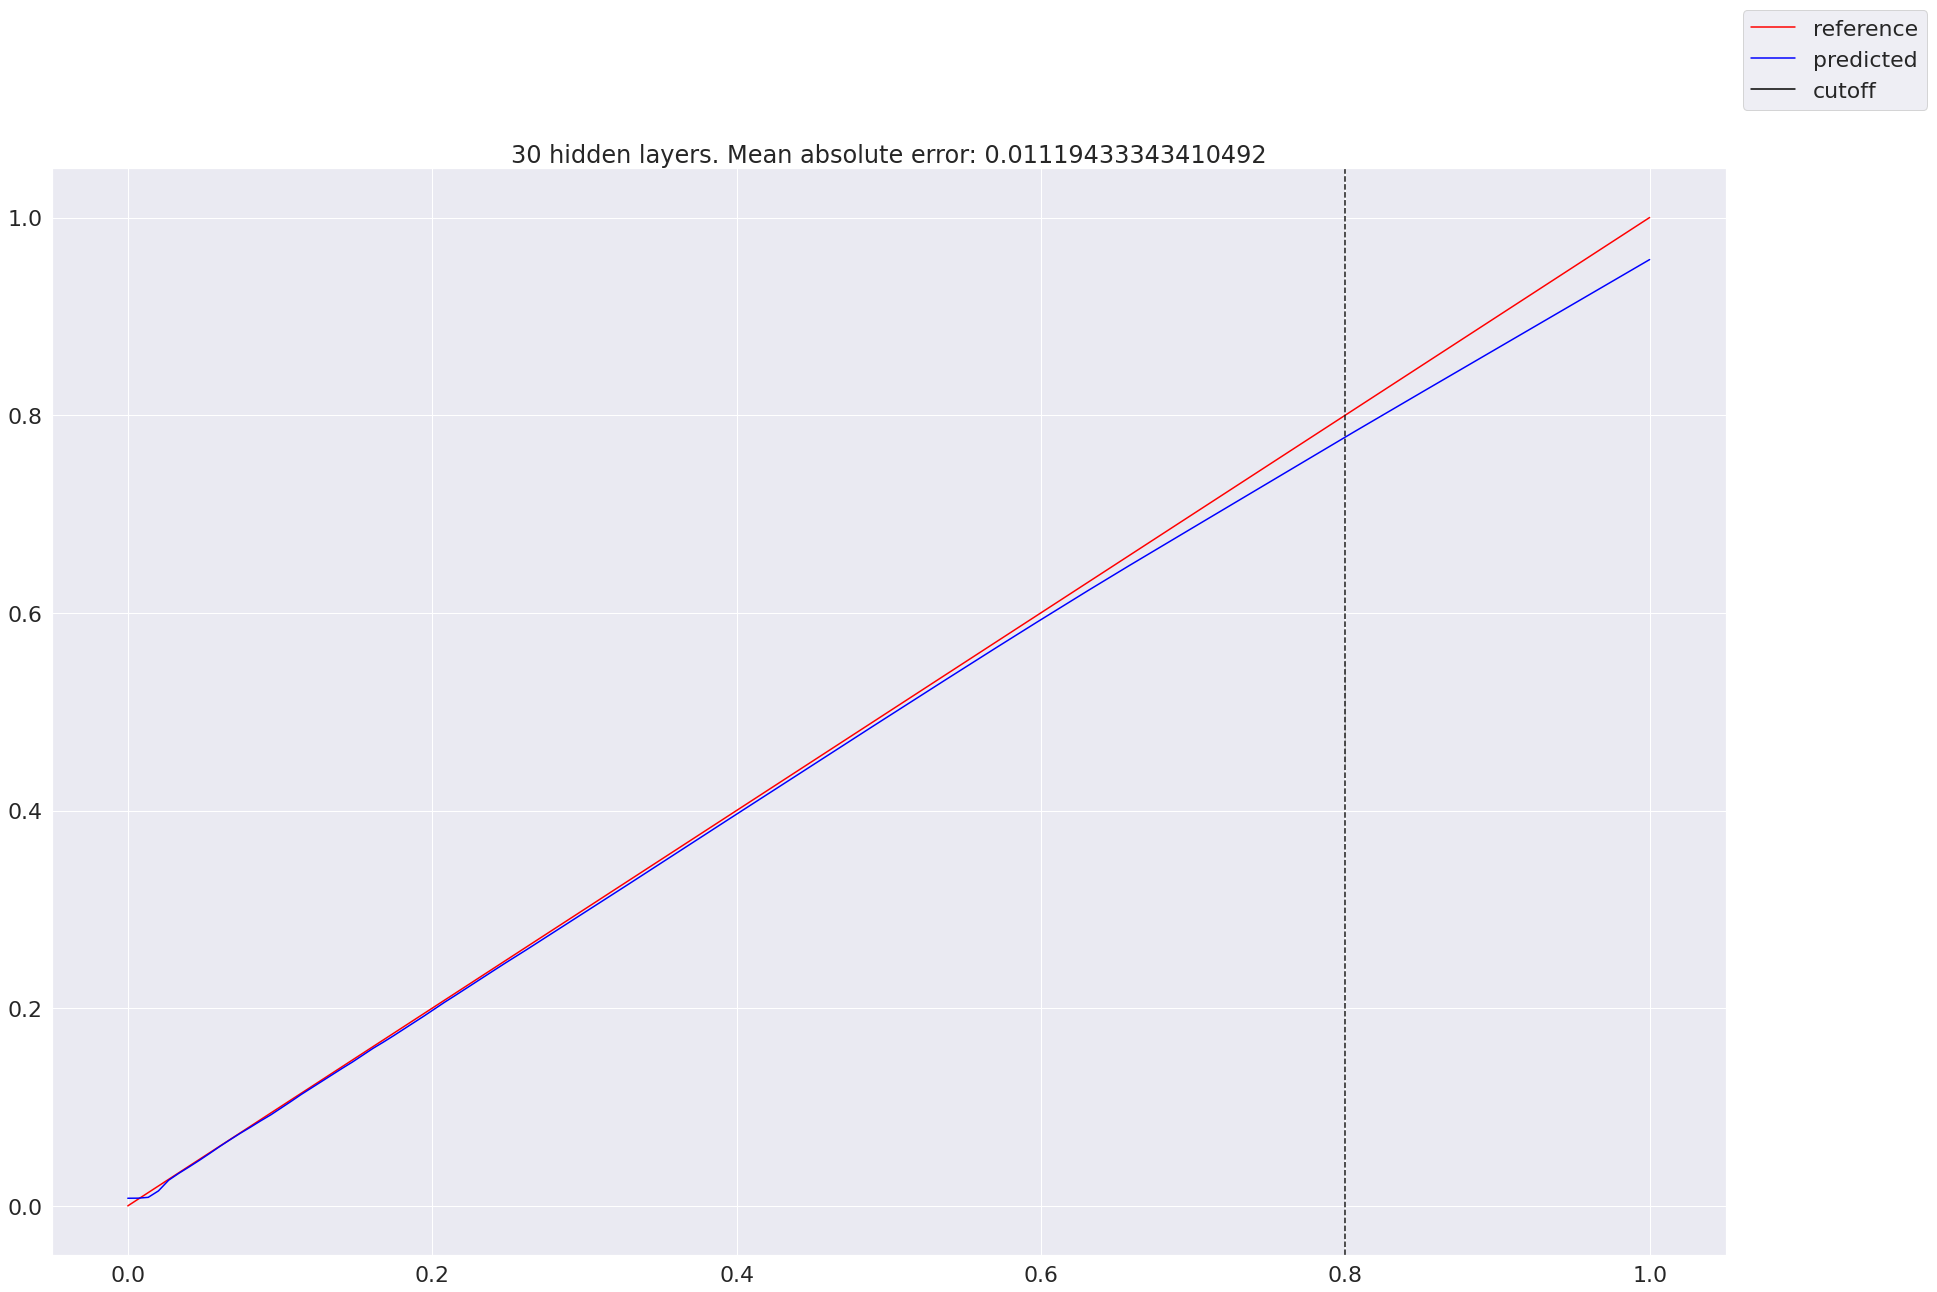

In [6]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

plot_results(grid, predicted, name, mean_absolute_error, 0.8)